In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

In [2]:
data = pd.read_pickle("../Data/Data.pickle")

# Descriptive Statistics 
We want to acquire a basic idea of what our data looks like because we can't see everything at once.
The logical first step is to examine the mean, lowest, and maximum values for each column.
The "'describe"' function in Pandas calculates these descriptive statistics for us.

We'll look for the *correlations* because we want to see what's connected to energy consumption (because we're trying to anticipate it later).
Pandas includes the "corr" function to identify correlations between features.

* "'TotalDemand"' has an average of 4619MW, with a minimum of 22 mW and a maximum of 14580 MW, according to the data. "'WetBulbTemperature"' varies from -9.0°C to 41°C. * "'TotalDemand"' is the most common.
Even though the correlation function only accounts for linear associations (straight lines), it is still valuable in determining which features should be graphed and included in our model.
"'WetBulbTemperature"' is most beneficial here, but "'StationPressure"' may also be relevant.

In [3]:
data.describe()

,TotalDemand,RRP,WetBulbTemperature,SeaPressure,StationPressure
count,1.656254e+06,1.656254e+06,1.656254e+06,1.656254e+06,1.656254e+06
mean,4.619521e+03,5.143376e+01,1.346488e+01,1.016537e+03,1.012487e+03
std,2.848791e+03,1.910091e+02,4.668864e+00,7.537316e+00,7.797894e+00
min,2.189000e+01,-1.000000e+03,-9.000000e-01,9.772000e+02,9.693000e+02
25%,1.413990e+03,2.336000e+01,9.900000e+00,1.011900e+03,1.007800e+03
50%,5.131249e+03,3.443000e+01,1.310000e+01,1.016800e+03,1.013100e+03
75%,6.591798e+03,5.490000e+01,1.700000e+01,1.021600e+03,1.017900e+03
max,1.457986e+04,1.470000e+04,4.100000e+01,1.041800e+03,1.037600e+03


In [4]:
data.corr()

,TotalDemand,RRP,WetBulbTemperature,SeaPressure,StationPressure
TotalDemand,1.000000,0.014473,0.357355,0.045073,0.189012
RRP,0.014473,1.000000,0.032810,-0.018706,-0.017725
WetBulbTemperature,0.357355,0.032810,1.000000,-0.249367,-0.125868
SeaPressure,0.045073,-0.018706,-0.249367,1.000000,0.887972
StationPressure,0.189012,-0.017725,-0.125868,0.887972,1.000000


#  Finding Long-Term Trends
## Energy over 20 Years

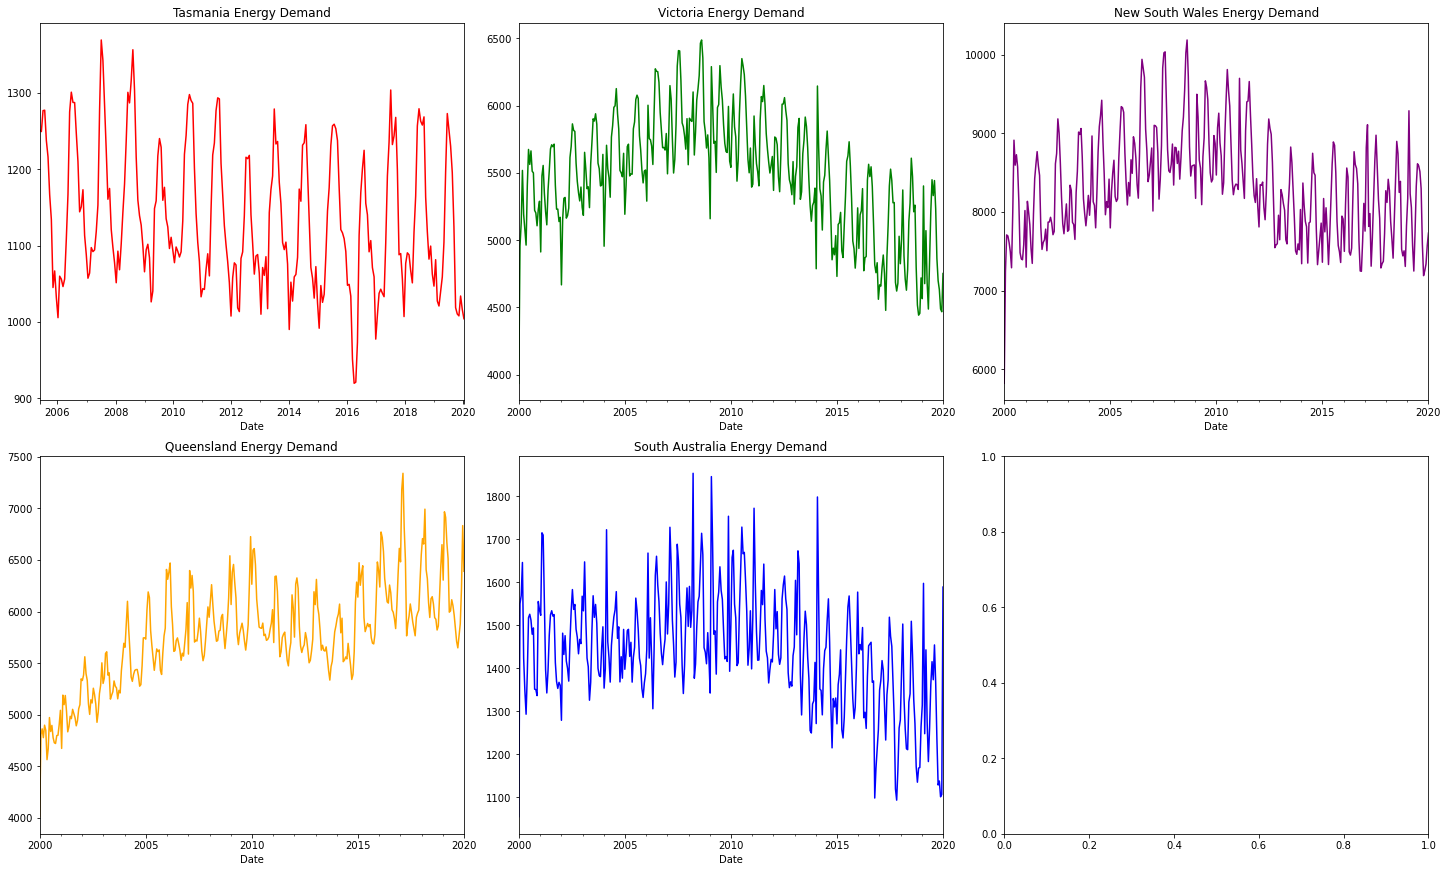

In [5]:
fig, axes  = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").resample("3W").mean()["TotalDemand"]["TAS"].plot(color="red", title="Tasmania Energy Demand", ax=axes[0,0]);
data.groupby("Region").resample("3W").mean()["TotalDemand"]["VIC"].plot(color="green", title="Victoria Energy Demand", ax=axes[0,1]);
data.groupby("Region").resample("3W").mean()["TotalDemand"]["NSW"].plot(color="purple", title="New South Wales Energy Demand", ax=axes[0,2]);
data.groupby("Region").resample("3W").mean()["TotalDemand"]["QLD"].plot(color="orange", title="Queensland Energy Demand", ax=axes[1,0]);
data.groupby("Region").resample("3W").mean()["TotalDemand"]["SA"].plot(color="blue", title="South Australia Energy Demand", ax=axes[1,1]);

Even after resampling, graphs might be difficult to comprehend.
So let's take it slowly and methodically.


The first trend you notice is that energy is always fluctuating between high and low points.
The highs and lows do not always coincide.

* 900 to 1400 in Tasmania and South Australia 
* 4500 to 6500 in Victoria
* 6000 to 10000 in New South Wales  
* 4500 to 7500 in Queensland

However, we can see that the patterns aren't always consistent.
There can be a quick increase in energy use (until 2010 in Queensland), a steep drop (after 2010 in Victoria), or even constant stability (in Tasmania)!
The patterns are certainly not regular or temperature-related (and so not predictable using historic temperature and energy data).

Despite the lack of data on these trends, we may make an educated estimate as to what is causing them.
We know that the population isn't steady and that states' populations grow at varying rates.
There has also been a significant improvement in the efficiency of technology, and economic conditions influence people's propensity to use power.
Furthermore, as a result of global warming, an increasing number of people are opting to install solar panels (which create unaccounted for energy).
We'll try to remove the trends before we start modelling because we don't have data on any of these features.

## Annual Energy Consumption
Let's take a closer look!
We'll look at trends that occur over the course of a year.
Because we're graphing 5 years instead of 20, we'll obviously need more data.

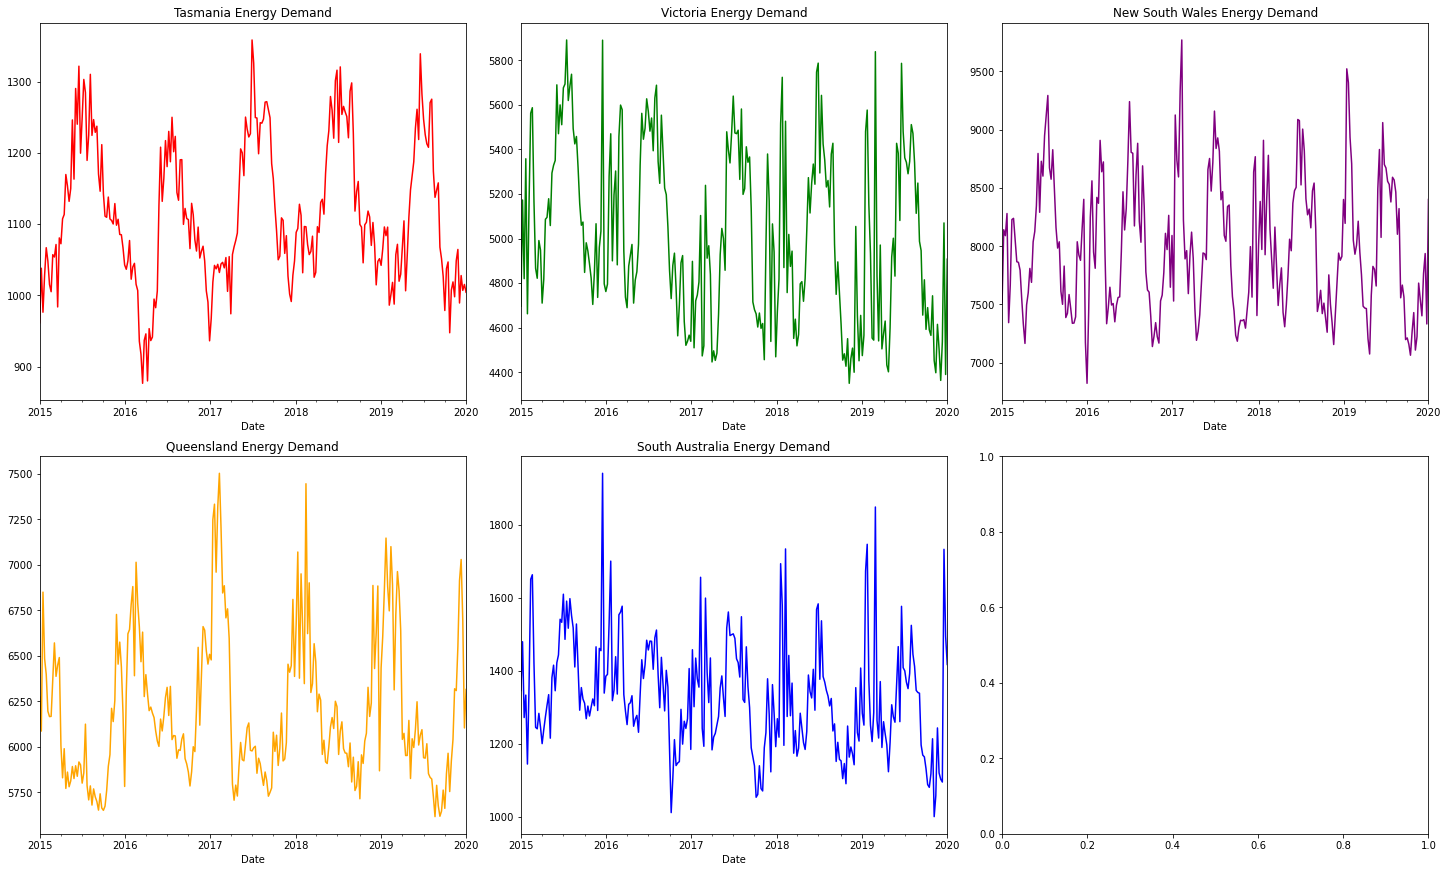

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").resample("W").mean()["TotalDemand"]["TAS"]["2015":"2020"].plot(color="red", title="Tasmania Energy Demand", ax=axes[0,0]);
data.groupby("Region").resample("W").mean()["TotalDemand"]["VIC"]["2015":"2020"].plot(color="green", title="Victoria Energy Demand", ax=axes[0,1]);
data.groupby("Region").resample("W").mean()["TotalDemand"]["NSW"]["2015":"2020"].plot(color="purple", title="New South Wales Energy Demand", ax=axes[0,2]);
data.groupby("Region").resample("W").mean()["TotalDemand"]["QLD"]["2015":"2020"].plot(color="orange", title="Queensland Energy Demand", ax=axes[1,0]);
data.groupby("Region").resample("W").mean()["TotalDemand"]["SA"]["2015":"2020"].plot(color="blue", title="South Australia Energy Demand", ax=axes[1,1]);

We can see that energy demand is lowest in the spring and autumn, and highest in the winter and/or summer.
In Tasmania, demand is higher in the winter than in the summer.
Victoria is comparable, but has more frequent summer energy demand peaks.
Queensland, on the other hand, consumes the most energy during the summer.
Summer and winter in New South Wales and South Australia are equally full of vitality!

In contrast to hot and humid New South Wales and South Australia, Tasmania is consistently cooler.
This would explain the discrepancies in where maximums and minimums occur.

## Temperature Trends in the Last 20 Years
However, temperature is just as crucial as energy.
As a result, we'll look into it as well!

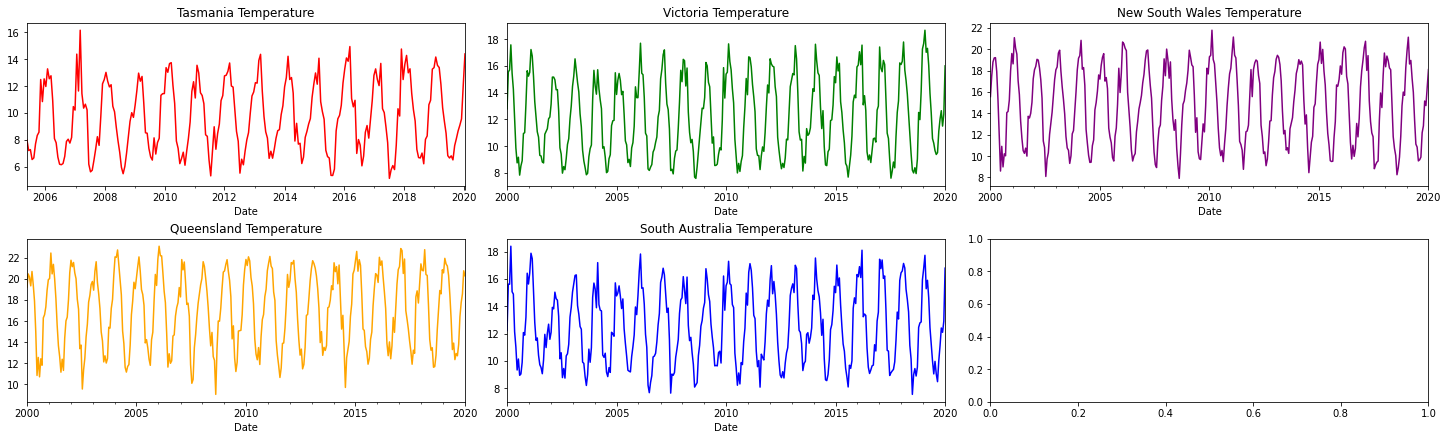

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6), constrained_layout=True)

data.groupby("Region").resample("3W").mean()["WetBulbTemperature"]["TAS"].plot(color= "red", title="Tasmania Temperature", ax=axes[0,0]);
data.groupby("Region").resample("3W").mean()["WetBulbTemperature"]["VIC"].plot(color= "green", title="Victoria Temperature", ax=axes[0,1]);
data.groupby("Region").resample("3W").mean()["WetBulbTemperature"]["NSW"].plot(color= "purple", title="New South Wales Temperature", ax=axes[0,2]);
data.groupby("Region").resample("3W").mean()["WetBulbTemperature"]["QLD"].plot(color= "orange", title="Queensland Temperature", ax=axes[1,0]);
data.groupby("Region").resample("3W").mean()["WetBulbTemperature"]["SA"].plot(color="blue", title="South Australia Temperature", ax=axes[1,1]);

Unlike the energy graphs, the temperature graphs do not show any significant trends right away.
However, we can see that the temperature ranges from roughly 8 degrees to around 22 degrees.
Although there are no substantial temperature differences between states in this graph, they do exist.
In contrast to hot and humid New South Wales and South Australia, Tasmania is consistently cooler.

## Correlations Between Temperature and Energy
We know that temperature and energy are closely linked, but we don't know how.
Let's see what happens!

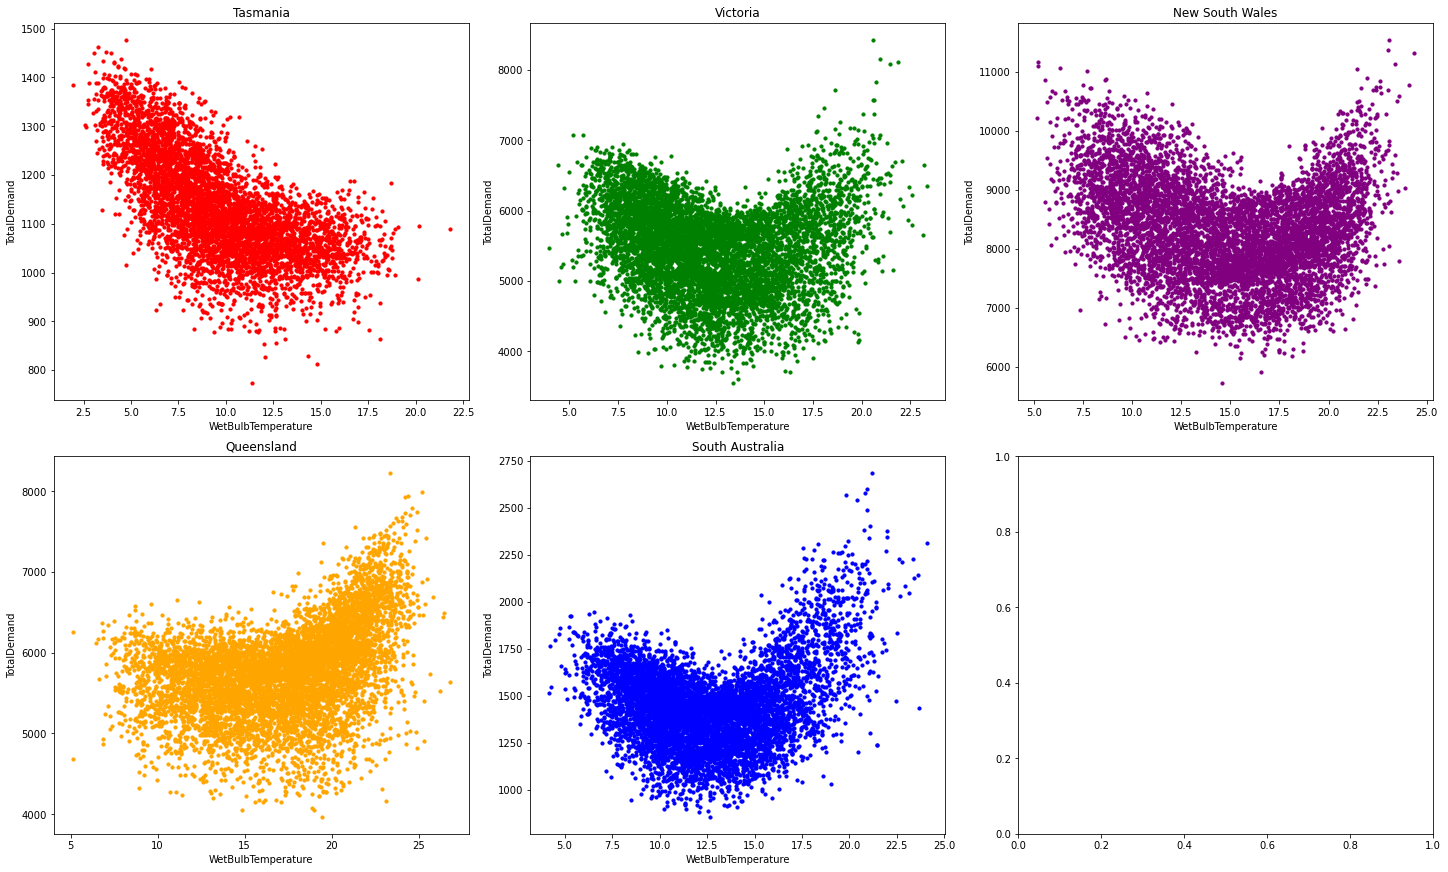

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").get_group("TAS").resample("D").mean().plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand", s=10, color= "red", ax=axes[0,0], title="Tasmania");
data.groupby("Region").get_group("VIC").resample("D").mean().plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand", s=10, color= "green", ax=axes[0,1], title="Victoria");
data.groupby("Region").get_group("NSW").resample("D").mean().plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand", s=10, color= "purple", ax=axes[0,2], title="New South Wales");
data.groupby("Region").get_group("QLD").resample("D").mean().plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand", s=10, color= "orange", ax=axes[1,0], title="Queensland");
data.groupby("Region").get_group("SA").resample("D").mean().plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand", s=10, color= "blue", ax=axes[1,1], title="South Australia");

These graphs demonstrate one key point: the stronger the trend, the more perplexing (and difficult) the relationship between temperature and energy consumption becomes.
This is why Tasmania's graph of temperature vs. energy consumption is nearly straight (albeit thick), whereas the rest is curved.
In other words, the wider and thicker the curve is, the larger the trend!

The tendency must be reversed because we lack population or economic data (in the next tutorial).

## Analysing Short Timeframes
The graphs below compare energy demand between regions for a single day and a week in the winter and summer.

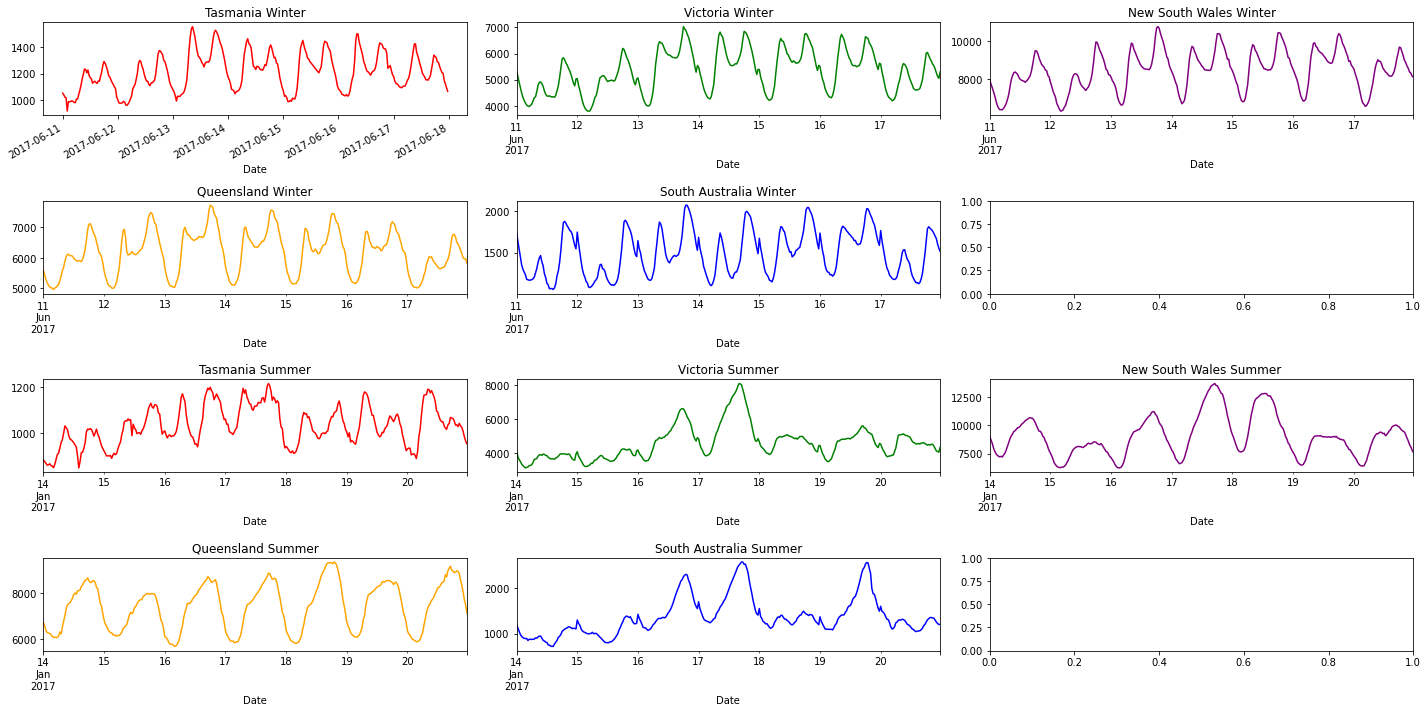

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 10), tight_layout=True)

# Winter
data["2017-06-11":"2017-06-17"].groupby("Region").get_group("TAS")["TotalDemand"].plot(color="red", title="Tasmania Winter", ax=axes[0,0]);
data["2017-06-11":"2017-06-17"].groupby("Region").get_group("VIC")["TotalDemand"].plot(color="green", title="Victoria Winter", ax=axes[0,1]);
data["2017-06-11":"2017-06-17"].groupby("Region").get_group("NSW")["TotalDemand"].plot(color="purple", title="New South Wales Winter", ax=axes[0,2]);
data["2017-06-11":"2017-06-17"].groupby("Region").get_group("QLD")["TotalDemand"].plot(color="orange", title="Queensland Winter", ax=axes[1,0]);
data["2017-06-11":"2017-06-17"].groupby("Region").get_group("SA")["TotalDemand"].plot(color="blue", title="South Australia Winter", ax=axes[1,1]);

# Summer
data["2017-1-14":"2017-1-20"].groupby("Region").get_group("TAS")["TotalDemand"].plot(color="red", title="Tasmania Summer", ax=axes[2,0]);
data["2017-1-14":"2017-1-20"].groupby("Region").get_group("VIC")["TotalDemand"].plot(color="green", title="Victoria Summer", ax=axes[2,1]);
data["2017-1-14":"2017-1-20"].groupby("Region").get_group("NSW")["TotalDemand"].plot(color="purple", title="New South Wales Summer", ax=axes[2,2]);
data["2017-1-14":"2017-1-20"].groupby("Region").get_group("QLD")["TotalDemand"].plot(color="orange", title="Queensland Summer", ax=axes[3,0]);
data["2017-1-14":"2017-1-20"].groupby("Region").get_group("SA")["TotalDemand"].plot(color="blue", title="South Australia Summer", ax=axes[3,1]);

Daily energy consumption in all states is almost the same.
Summer and Winter have two distinct peaks.
The first is smaller and takes place during the day (5-9 a.m.), whilst the second is larger and takes place at night (4-7 pm).
These occur when people are at their most active in their houses (before and after work).
These patterns continue despite the fact that only a few graphs can be shown here (swapping out different days will show this).

Summer energy demand is equivalent to winter demand over a week, but demand grows significantly over the week!

/tmp/ipykernel_3782/3476259834.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data["2017-06-11"].groupby("Region").get_group("TAS")["TotalDemand"].plot(title="Tasmania", ax=axes[0,0], color="red");
/tmp/ipykernel_3782/3476259834.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data["2017-06-11"].groupby("Region").get_group("VIC")["TotalDemand"].plot(title="Victoria", ax=axes[0,1], color="green");
/tmp/ipykernel_3782/3476259834.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  da

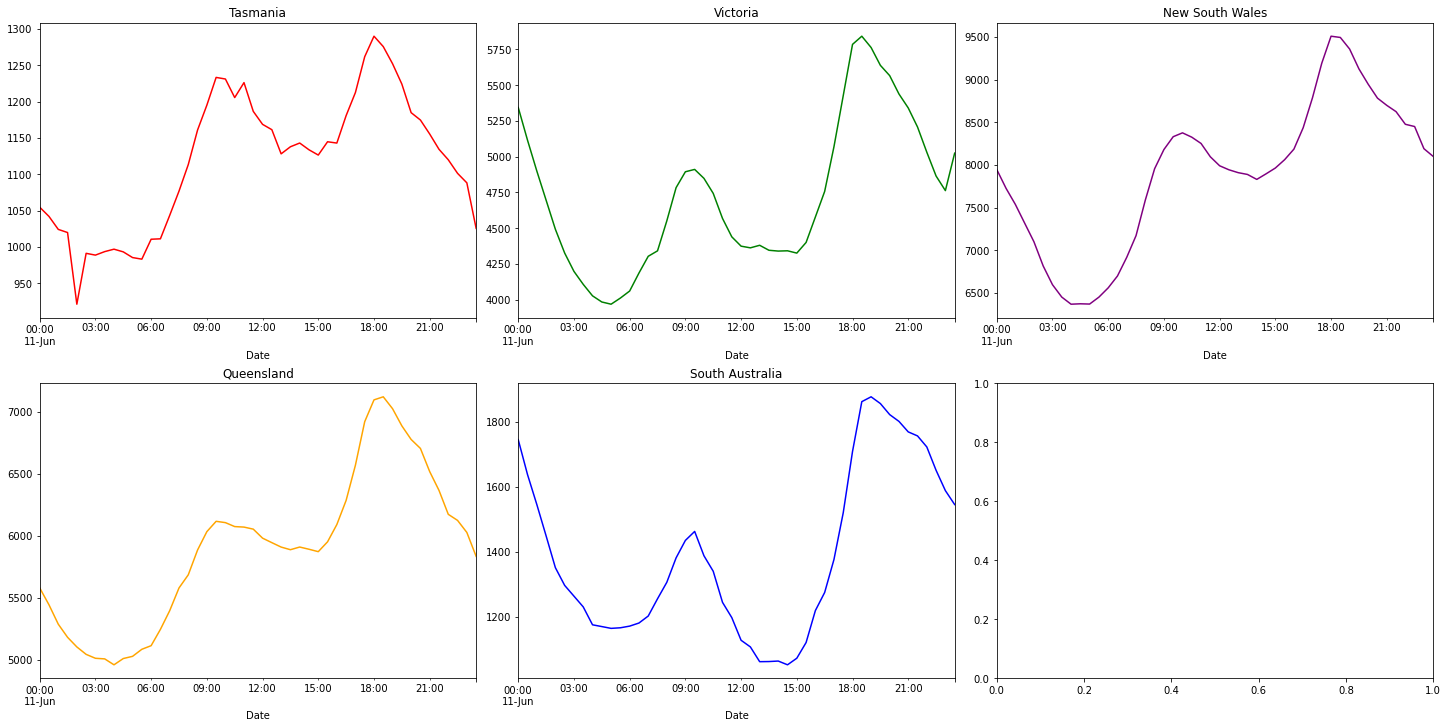

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), constrained_layout=True)

data["2017-06-11"].groupby("Region").get_group("TAS")["TotalDemand"].plot(title="Tasmania", ax=axes[0,0], color="red");
data["2017-06-11"].groupby("Region").get_group("VIC")["TotalDemand"].plot(title="Victoria", ax=axes[0,1], color="green");
data["2017-06-11"].groupby("Region").get_group("NSW")["TotalDemand"].plot(title="New South Wales", ax=axes[0,2], color="purple");
data["2017-06-11"].groupby("Region").get_group("QLD")["TotalDemand"].plot(title="Queensland", ax=axes[1,0], color="orange");
data["2017-06-11"].groupby("Region").get_group("SA")["TotalDemand"].plot(title="South Australia", ax=axes[1,1], color="blue");

From these charts, we can see that energy usage ramps up from 6 am to 9 am and again from 3 pm to 6 pm.
At 12 am to 3 pm our energy usage remains stable.
It typically drops after the start and end of the day (likely when most people are asleep).
The demand for summer and winter days are mostly similar.